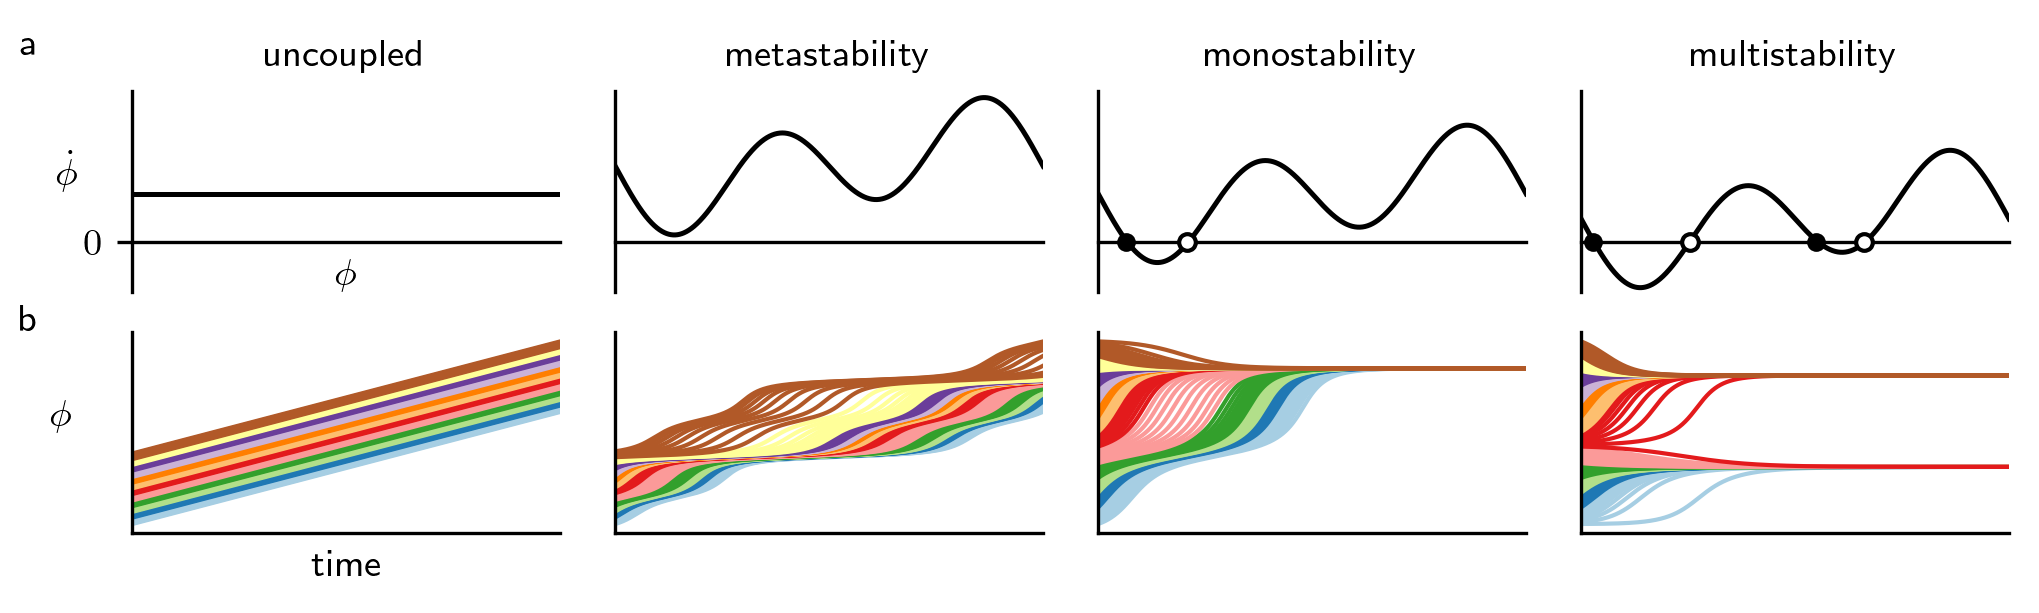

In [32]:
import numpy as np
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt

ts = 1000
N=100

fs = 9
plt.rcParams.update({'font.size': fs})

phi = np.linspace(0, 2.0*np.pi, ts)
phi_dot_uncoupled = np.zeros((ts))
phi_dot_metastable = np.zeros((ts))
phi_dot_monostable = np.zeros((ts))
phi_dot_multistable = np.zeros((ts))

deltaomega = 1.9
a = 0.0
b = 0.0
for ii in range(ts):
    phi_dot_uncoupled[ii] = deltaomega - a * np.sin(phi[ii]) - 2.0 * b * np.sin(2*phi[ii])

    
deltaomega = 3
a = 1.0
b = 1.0
for ii in range(ts):
    phi_dot_metastable[ii] = deltaomega - a * np.sin(phi[ii]) - 2.0 * b * np.sin(2*phi[ii])


deltaomega = 1.9
a = 1.0
b = 1.0
for ii in range(ts):
    phi_dot_monostable[ii] = deltaomega - a * np.sin(phi[ii]) - 2.0 * b * np.sin(2*phi[ii])


deltaomega = 0.9
a = 1.0
b = 1.0
for ii in range(ts):
    phi_dot_multistable[ii] = deltaomega - a * np.sin(phi[ii]) - 2.0 * b * np.sin(2*phi[ii])
   
    
    
    
fig = plt.figure(dpi=300)
scale_fact = 0.8
fig.set_size_inches((8.5*scale_fact),(2.6*scale_fact))

lwval = 1.2
ymin = -2
ymax = 6
xmin = 0
xmax = 2*np.pi
ax1 = fig.add_subplot(2, 4, 1)
plt.plot(phi, phi_dot_uncoupled,'black',lw=lwval)
ax1.spines['left'].set_position('zero')
ax1.spines['bottom'].set_position('zero')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim([ymin,ymax])
ax1.set_xlim([xmin,xmax])
ax1.set_xticks([])
ax1.set_yticks([0.0])
plt.xlabel(r'$\phi$', fontsize=fs)
plt.ylabel(r'$\dot\phi$',rotation=0, fontsize=fs)
plt.title('uncoupled', fontsize=fs)

ax2 = fig.add_subplot(2, 4, 2)
plt.plot(phi, phi_dot_metastable,'black',lw=lwval)
ax2.spines['left'].set_position('zero')
ax2.spines['bottom'].set_position('zero')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim([ymin,ymax])
ax2.set_xlim([xmin,xmax])
ax2.set_xticks([])
ax2.set_yticks([])
plt.title('metastability', fontsize=fs)

ax3 = fig.add_subplot(2, 4, 3)
plt.plot(phi, phi_dot_monostable,'black',lw=lwval)
ax3.spines['left'].set_position('zero')
ax3.spines['bottom'].set_position('zero')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylim([ymin,ymax])
ax3.set_xlim([xmin,xmax])
ax3.set_xticks([])
ax3.set_yticks([])
plt.title('monostability', fontsize=fs)

ax4 = fig.add_subplot(2, 4, 4)
plt.plot(phi, phi_dot_multistable,'black',lw=lwval)
ax4.spines['left'].set_position('zero')
ax4.spines['bottom'].set_position('zero')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_ylim([ymin,ymax])
ax4.set_xlim([xmin,xmax])
ax4.set_xticks([])
ax4.set_yticks([])
plt.title('multistability', fontsize=fs)
ax4.plot(0.18, 0, '.', markerfacecolor='black', markeredgecolor='white', markeredgewidth=0, markersize=9)
ax4.plot(1.6, 0, '.', markerfacecolor='white', markeredgecolor='black', markeredgewidth=1, markersize=8, zorder=3)
ax4.plot(3.45, 0, '.', markerfacecolor='black', markeredgecolor='white', markeredgewidth=0, markersize=9)
ax4.plot(4.15, 0, '.', markerfacecolor='white', markeredgecolor='black', markeredgewidth=1, markersize=8, zorder=3)
ax3.plot(0.4, 0, '.', markerfacecolor='black', markeredgecolor='white', markeredgewidth=0, markersize=9)
ax3.plot(1.3, 0, '.', markerfacecolor='white', markeredgecolor='black', markeredgewidth=1, markersize=8, zorder=3)




# generate example time series
ts = 5000

def compute_phi(a, b, deltaomega, ts):
    phi = np.zeros((ts,N))
    shift = 1.6
    phi[0,:] = np.linspace(0+shift,2*np.pi+shift-0.3,N)
    sqrtQ = 0.0
    dt = 0.001
    for ii in range(ts-1):
        phi[ii+1,:] = phi[ii,:] + dt*(deltaomega - a * np.sin(phi[ii,:]) - 2.0 * b * np.sin(2*phi[ii,:]) + sqrtQ * randn(N))
    return phi

# monostable
deltaomega = 1.9
a = 1.0
b = 1.0
phi_monostable = compute_phi(a, b, deltaomega, ts)

# multistable
deltaomega = 0.9
phi_multistable = compute_phi(a, b, deltaomega, ts)

# metastable
deltaomega = 3.0
phi_metastable = compute_phi(a, b, deltaomega, ts)

# uncoupled
deltaomega = 1.9
a = 0.0
b = 0.0
phi_uncoupled = compute_phi(a, b, deltaomega, ts)



import cycler
color = plt.cm.Paired(np.linspace(0, 1, N))
#color = plt.cm.inferno(np.linspace(0, 1, N))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)



lwval = 1.0
ymin = -2
ymax = 6
xmin = 0
xmax = ts-1
ax5 = fig.add_subplot(2, 4, 5)
plt.plot(phi_uncoupled,lw=lwval)
ax5.spines['left'].set_position('zero')
#ax5.spines['bottom'].set_position('zero')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
#ax5.set_ylim([ymin,ymax])
ax5.set_xlim([xmin,xmax])
ax5.set_xticks([])
ax5.set_yticks([])
plt.xlabel('time')
plt.ylabel(r'$\phi$',rotation=0, labelpad=17)


ax6 = fig.add_subplot(2, 4, 6)
plt.plot(phi_metastable,lw=lwval)
ax6.spines['left'].set_position('zero')
#ax6.spines['bottom'].set_position('zero')
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
#ax6.set_ylim([ymin,ymax])
ax6.set_xlim([xmin,xmax])
ax6.set_xticks([])
ax6.set_yticks([])


ax7 = fig.add_subplot(2, 4, 7)
plt.plot(phi_monostable,lw=lwval)
ax7.spines['left'].set_position('zero')
#ax7.spines['bottom'].set_position('zero')
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
#ax7.set_ylim([ymin,ymax])
ax7.set_xlim([xmin,xmax])
ax7.set_xticks([])
ax7.set_yticks([])


ax8 = fig.add_subplot(2, 4, 8)
plt.plot(phi_multistable,lw=lwval)
ax8.spines['left'].set_position('zero')
#ax8.spines['bottom'].set_position('zero')
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
#ax8.set_ylim([ymin,ymax])
ax8.set_xlim([xmin,xmax])
ax8.set_xticks([])
ax8.set_yticks([])



plt.tight_layout()
ax1.annotate(u"a", (0.01, 0.91), xycoords="figure fraction", fontsize=fs, weight='bold')
ax5.annotate(u"b", (0.01, 0.46), xycoords="figure fraction", fontsize=fs, weight='bold')



plt.savefig("Figure1.png", dpi=300,facecolor='white', edgecolor='none',bbox_inches='tight', transparent=True)